In [ ]:
#EDA
import pandas as pd
import statsmodels as sm
import numpy as np

In [ ]:
pip install fitter

     |████████████████████████████████| 47 kB 3.1 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25025 sha256=3f10ca2807db9bc81ca4dda8df57f8bb7287e3470cd302f3d17711364215a7e3
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=a4e969d6eead07e6d90389fe02a4262460c08382a7dc3b4fa3da285b99ff2b18
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


EDA for time series

In [ ]:
dataf = pd.read_csv('raw_data.csv')#, index_col = 'Date', parse_dates=True)
dataf['Date'] = pd.to_datetime(dataf['Date'], dayfirst=True)

In [ ]:
dataf

,Date,r1mw,r2mw,r3mw,r4mw,r1m,r2m,r3m,r4m,r1c,r2c,r3c,r4c,r1a,r2a,r3a,r4a
0,2009-01-01,26,41,37,24,264,272,270,273,311,309,353,305,107,422,1367,632
1,2009-01-08,28,41,31,22,263,270,271,272,310,313,318,304,632,632,947,632
2,2009-01-15,29,36,27,22,265,272,271,269,311,310,309,305,737,737,947,1157
3,2009-01-22,28,35,28,25,266,274,271,270,312,311,308,309,317,737,737,1157
4,2009-01-29,26,31,25,28,267,269,270,271,309,309,304,311,947,842,1367,1157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2014-11-20,41,33,21,47,274,272,269,271,311,304,302,310,737,1262,1682,737
308,2014-11-27,40,27,24,45,271,272,268,267,310,304,303,307,737,842,1577,527
309,2014-12-04,38,26,28,45,269,270,265,267,307,304,303,307,842,1052,1367,842
310,2014-12-11,32,26,32,49,272,273,266,264,302,305,303,307,842,1052,1472,737


OUTLIER DETECTION

In [ ]:
df_no_outlier = pd.DataFrame(dataf)

In [ ]:
products = ['r1mw',	'r2mw',	'r3mw',	'r4mw',	'r1m',	'r2m',	'r3m',	'r4m',	'r1c',	'r2c',	'r3c',	'r4c',	'r1a',	'r2a',	'r3a',	'r4a']
for i in products:
  Q1 = dataf[i].quantile(0.25)
  Q3 = dataf[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  df_no_outlier[i] = dataf[i][(dataf[i]>lower_limit)&(dataf[i]<upper_limit)]

In [ ]:
df_no_outlier

,Date,r1mw,r2mw,r3mw,r4mw,r1m,r2m,r3m,r4m,r1c,r2c,r3c,r4c,r1a,r2a,r3a,r4a
0,2009-01-01,26.0,41,37,24,264.0,272,270.0,273,311.0,309.0,NaN,305.0,107,422.0,1367.0,632.0
1,2009-01-08,28.0,41,31,22,263.0,270,271.0,272,310.0,313.0,318.0,304.0,632,632.0,947.0,632.0
2,2009-01-15,29.0,36,27,22,265.0,272,271.0,269,311.0,310.0,309.0,305.0,737,737.0,947.0,1157.0
3,2009-01-22,28.0,35,28,25,266.0,274,271.0,270,312.0,311.0,308.0,309.0,317,737.0,737.0,1157.0
4,2009-01-29,26.0,31,25,28,267.0,269,270.0,271,309.0,309.0,304.0,311.0,947,842.0,1367.0,1157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2014-11-20,41.0,33,21,47,274.0,272,269.0,271,311.0,304.0,302.0,310.0,737,1262.0,1682.0,737.0
308,2014-11-27,40.0,27,24,45,271.0,272,268.0,267,310.0,304.0,303.0,307.0,737,842.0,1577.0,527.0
309,2014-12-04,38.0,26,28,45,269.0,270,265.0,267,307.0,304.0,303.0,307.0,842,1052.0,1367.0,842.0
310,2014-12-11,32.0,26,32,49,272.0,273,266.0,264,302.0,305.0,303.0,307.0,842,1052.0,1472.0,737.0


In [ ]:
df_no_outlier['r3c'].mean

<bound method Series.mean of 0        NaN
1      318.0
2      309.0
3      308.0
4      304.0
       ...  
307    302.0
308    303.0
309    303.0
310    303.0
311    304.0
Name: r3c, Length: 312, dtype: float64>

ADJUSTMENT FOR OUTLIER MISSING VALUES

In [ ]:
x = df_no_outlier.iloc[:, :].values
x

array([[Timestamp('2009-01-01 00:00:00'), 26.0, 41, ..., 422.0, 1367.0,
        632.0],
       [Timestamp('2009-01-08 00:00:00'), 28.0, 41, ..., 632.0, 947.0,
        632.0],
       [Timestamp('2009-01-15 00:00:00'), 29.0, 36, ..., 737.0, 947.0,
        1157.0],
       ...,
       [Timestamp('2014-12-04 00:00:00'), 38.0, 26, ..., 1052.0, 1367.0,
        842.0],
       [Timestamp('2014-12-11 00:00:00'), 32.0, 26, ..., 1052.0, 1472.0,
        737.0],
       [Timestamp('2014-12-18 00:00:00'), 32.0, 28, ..., 1367.0, 1052.0,
        527.0]], dtype=object)

In [ ]:
x[0][11]

nan

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:,1:])   #3 because last index is excluded
x[:,1:] = imputer.transform(x[:,1:])

In [ ]:
x

array([[Timestamp('2009-01-01 00:00:00'), 26.0, 41.0, ..., 422.0, 1367.0,
        632.0],
       [Timestamp('2009-01-08 00:00:00'), 28.0, 41.0, ..., 632.0, 947.0,
        632.0],
       [Timestamp('2009-01-15 00:00:00'), 29.0, 36.0, ..., 737.0, 947.0,
        1157.0],
       ...,
       [Timestamp('2014-12-04 00:00:00'), 38.0, 26.0, ..., 1052.0,
        1367.0, 842.0],
       [Timestamp('2014-12-11 00:00:00'), 32.0, 26.0, ..., 1052.0,
        1472.0, 737.0],
       [Timestamp('2014-12-18 00:00:00'), 32.0, 28.0, ..., 1367.0,
        1052.0, 527.0]], dtype=object)

In [ ]:
products = ['Date', 'r1mw',	'r2mw',	'r3mw',	'r4mw',	'r1m',	'r2m',	'r3m',	'r4m',	'r1c',	'r2c',	'r3c',	'r4c',	'r1a',	'r2a',	'r3a',	'r4a']
df_clean = pd.DataFrame(x,columns=products)

FINAL DATASET

In [ ]:
df_clean

,Date,r1mw,r2mw,r3mw,r4mw,r1m,r2m,r3m,r4m,r1c,r2c,r3c,r4c,r1a,r2a,r3a,r4a
0,2009-01-01,26,41,37,24,264,272,270,273,311,309,311.01,305,107,422,1367,632
1,2009-01-08,28,41,31,22,263,270,271,272,310,313,318,304,632,632,947,632
2,2009-01-15,29,36,27,22,265,272,271,269,311,310,309,305,737,737,947,1157
3,2009-01-22,28,35,28,25,266,274,271,270,312,311,308,309,317,737,737,1157
4,2009-01-29,26,31,25,28,267,269,270,271,309,309,304,311,947,842,1367,1157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2014-11-20,41,33,21,47,274,272,269,271,311,304,302,310,737,1262,1682,737
308,2014-11-27,40,27,24,45,271,272,268,267,310,304,303,307,737,842,1577,527
309,2014-12-04,38,26,28,45,269,270,265,267,307,304,303,307,842,1052,1367,842
310,2014-12-11,32,26,32,49,272,273,266,264,302,305,303,307,842,1052,1472,737


In [ ]:
products = ['r1mw',	'r2mw',	'r3mw',	'r4mw',	'r1m',	'r2m',	'r3m',	'r4m',	'r1c',	'r2c',	'r3c',	'r4c',	'r1a',	'r2a',	'r3a',	'r4a']
for i in products:
  df_clean[i] = pd.to_numeric(df_clean[i])

16 time series

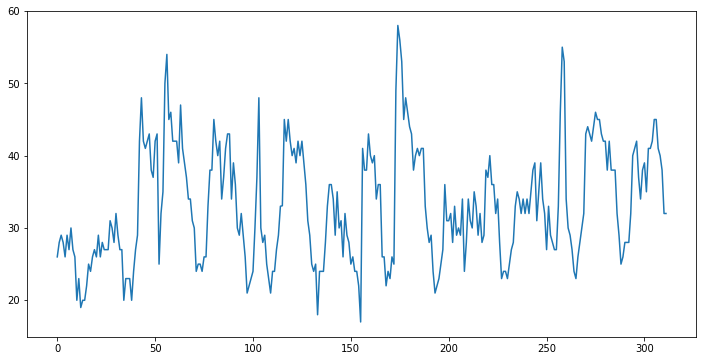

In [ ]:
df_clean['r1mw'].plot(figsize=(12,6))

In [ ]:
df_clean.dtypes

Date    datetime64[ns]
r1mw           float64
r2mw           float64
r3mw           float64
r4mw           float64
r1m            float64
r2m            float64
r3m            float64
r4m            float64
r1c            float64
r2c            float64
r3c            float64
r4c            float64
r1a            float64
r2a            float64
r3a            float64
r4a            float64
dtype: object

In [ ]:
df_clean.to_csv('file_name.csv')

SHAPIRO WILK TEST

In [ ]:
from scipy import stats
stat, p = stats.shapiro(df_clean['r1mw'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05 ## threshold
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')
    
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(df_clean['r1mw'])
plt.title('Region 1 MW',size=25)

SEASONAL DECOMPOSITION

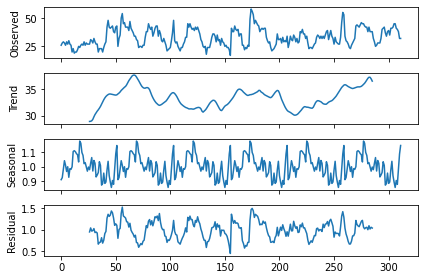

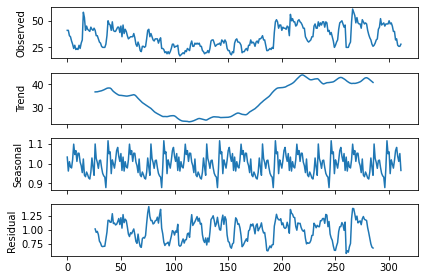

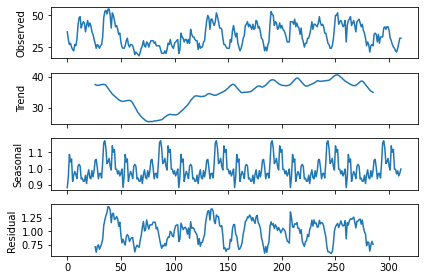

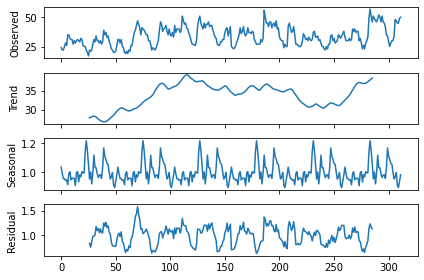

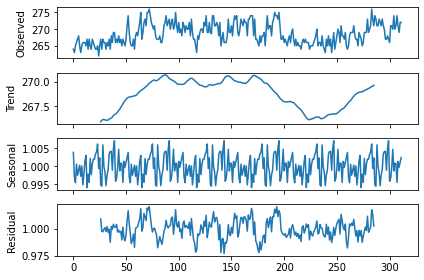

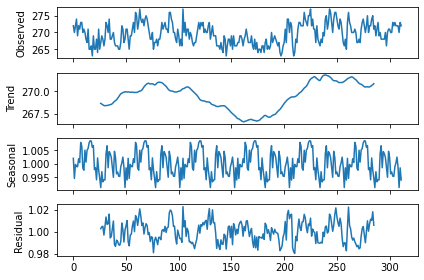

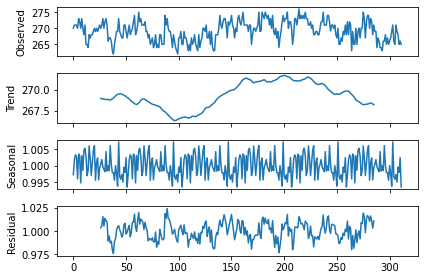

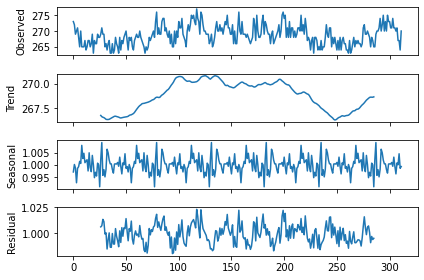

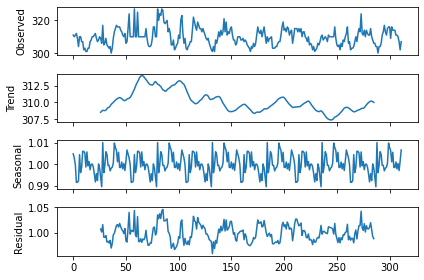

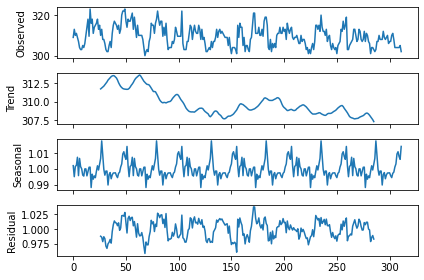

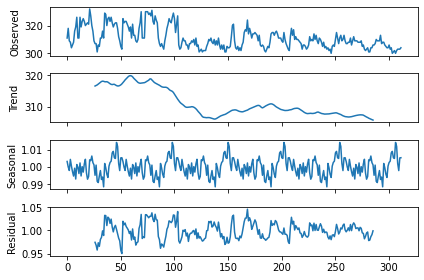

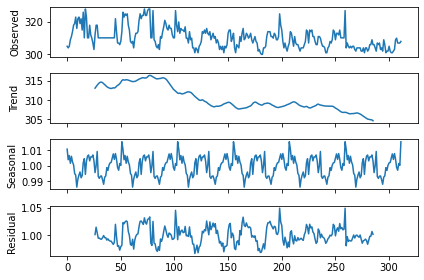

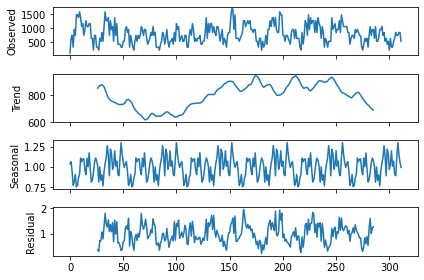

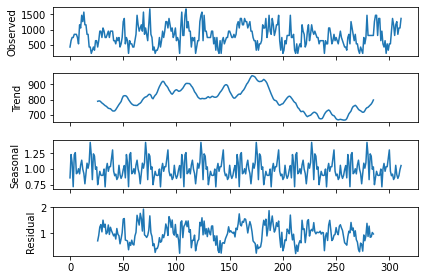

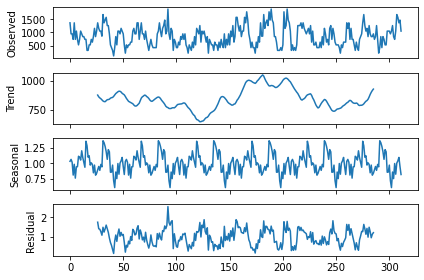

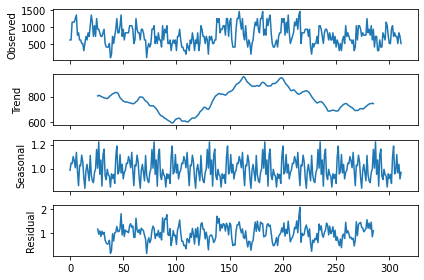

In [ ]:
for i in products:
  from statsmodels.tsa.seasonal import seasonal_decompose
  resr1mw= seasonal_decompose(df_clean[i], model = 'multiplicative',freq = 52)
  resr1mw.plot();

DISTRIBUTION FITTER

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4357: IntegrationWarning: The integral is probably divergent, o

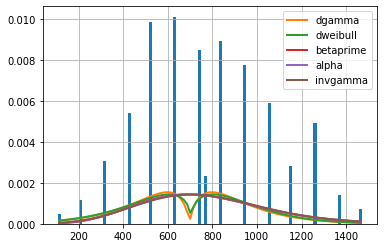

In [ ]:
for i in products:
  from fitter import Fitter
  f = Fitter(df_clean[i])
  f.fit()
  # may take some time since by default, all distributions are tried
  # but you call manually provide a smaller set of distributions
  f.summary()

,sumsquare_error,aic,bic,kl_div
dgamma,0.000450,1529.206959,-4179.092092,inf
dweibull,0.000451,1522.701748,-4178.240667,inf
betaprime,0.000453,1525.874785,-4171.193225,inf
alpha,0.000453,1518.609207,-4176.931943,inf
invgamma,0.000453,1516.162143,-4176.929054,inf


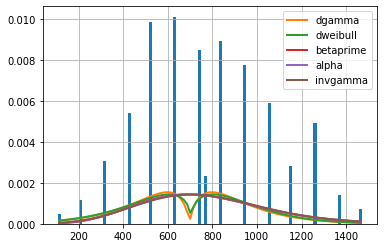

In [ ]:
f.summary()

sSTATIONARITY TEST

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
 #ts is stationary if p < alpha
 for i in products:
   print(i)
   adf_test(df_clean[i])

r1mw
1. ADF :  -5.932825508964037
2. P-Value :  2.3585060577947017e-07
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 308
5. Critical Values :
	 1% :  -3.45176116018037
	 5% :  -2.870970093607691
	 10% :  -2.571794416006072
r2mw
1. ADF :  -3.5870220898394876
2. P-Value :  0.00601403996546783
3. Num Of Lags :  6
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 305
5. Critical Values :
	 1% :  -3.451973573620699
	 5% :  -2.8710633193086648
	 10% :  -2.5718441306100512
r3mw
1. ADF :  -5.841167294086635
2. P-Value :  3.774471170460445e-07
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 307
5. Critical Values :
	 1% :  -3.4518314994261337
	 5% :  -2.8710009653519166
	 10% :  -2.571810878948318
r4mw
1. ADF :  -4.153383435432119
2. P-Value :  0.0007894057106720667
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression and Critical Values Calcul

PLOTS

ACF PLOT

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


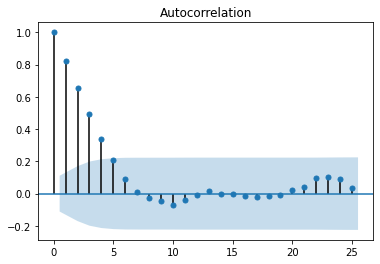

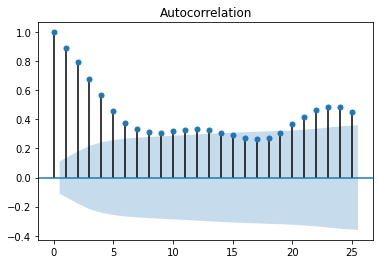

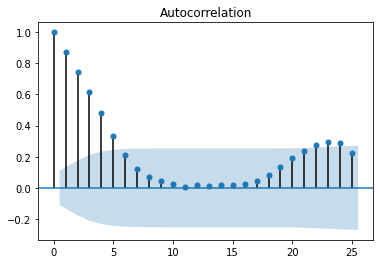

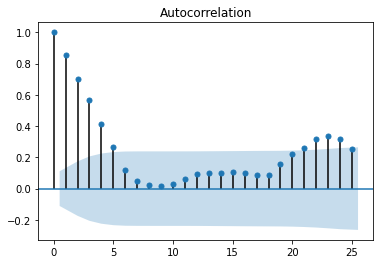

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


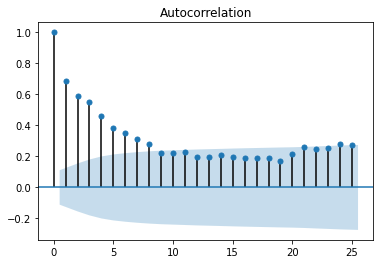

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


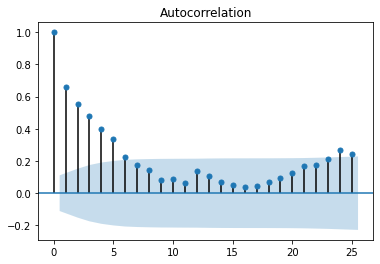

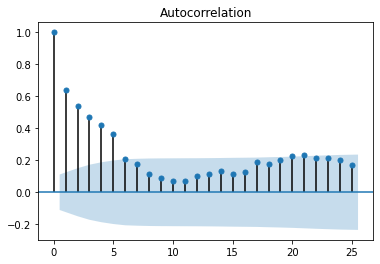

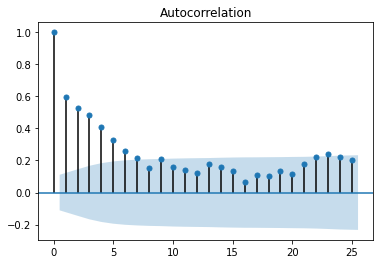

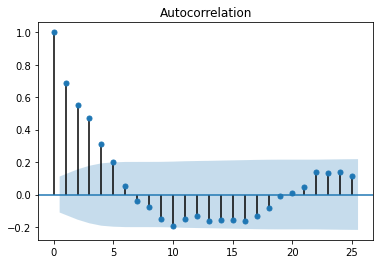

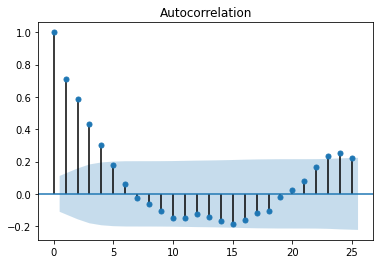

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


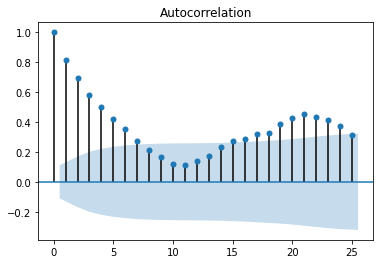

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


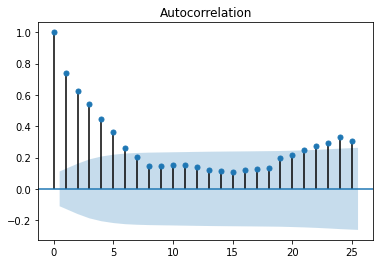

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


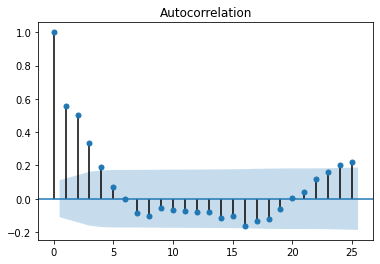

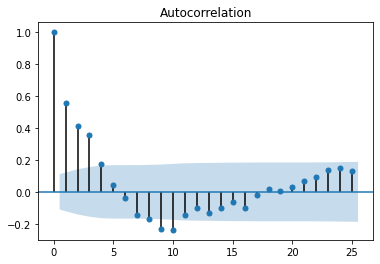

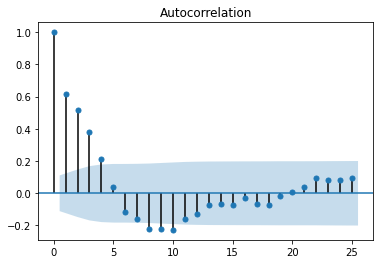

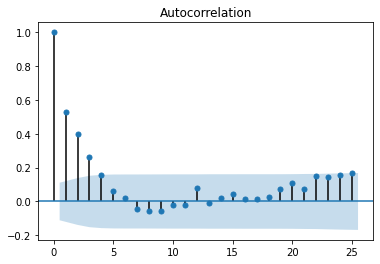

In [ ]:
#ACF graph
for i in products:
  from statsmodels.graphics.tsaplots import plot_acf
  import matplotlib.pyplot as plt
  plot_acf(x=df_clean[i])
  plt.show()
